In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [ ]:
# Veri setini okuma
dframe = pd.read_csv('bitcoin.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Okunan veri setinin ilk 10 satırı
dframe.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0
5,1417412280,300.0,300.0,300.0,300.0,0.01,3.0,300.0
6,1417412340,300.0,300.0,300.0,300.0,0.01,3.0,300.0
7,1417412400,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,1417412460,300.0,300.0,300.0,300.0,0.01,3.0,300.0
9,1417412520,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [ ]:
# Pandas ile timestamp date'e çeviriliyor
dframe['date'] = pd.to_datetime(dframe['Timestamp'],unit='s').dt.date
group = dframe.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [ ]:
# son 30 günlük verileri test veri kümesi olarak alabilmemiz için veri kümesini böldük
prediction_days = 30
dframe_train= Real_Price[:len(Real_Price)-prediction_days]
dframe_test= Real_Price[len(Real_Price)-prediction_days:]

In [ ]:
# Veri ön işleme
training_set = dframe_train.values
training_set = np.reshape(training_set, (len(training_set), 1))

#sklearn paketini içe aktardık ve MinMaxScaler'ı kullandık
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [ ]:
import sys; sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
# Keras kitaplıklarını ve ilgili paketleri içe aktarma
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# RNN modelini başlatma
regressor = Sequential()

# Giriş katmanını ve LSTM katmanını ekleme
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Çıktı katmanını ekleme
regressor.add(Dense(units = 1))

# CRNN'yi derleme
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# RNN'yi Eğitim setine takma
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: nan
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: nan
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: nan
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: nan
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: nan
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: nan
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: nan
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: nan
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: nan
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: nan
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: nan
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: nan
Epoch 13/100
1/1 [==============================] - 0s 14ms/step - loss: nan
Epoch 14/100


In [ ]:
# Tahminleri yapma
test_set = dframe_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

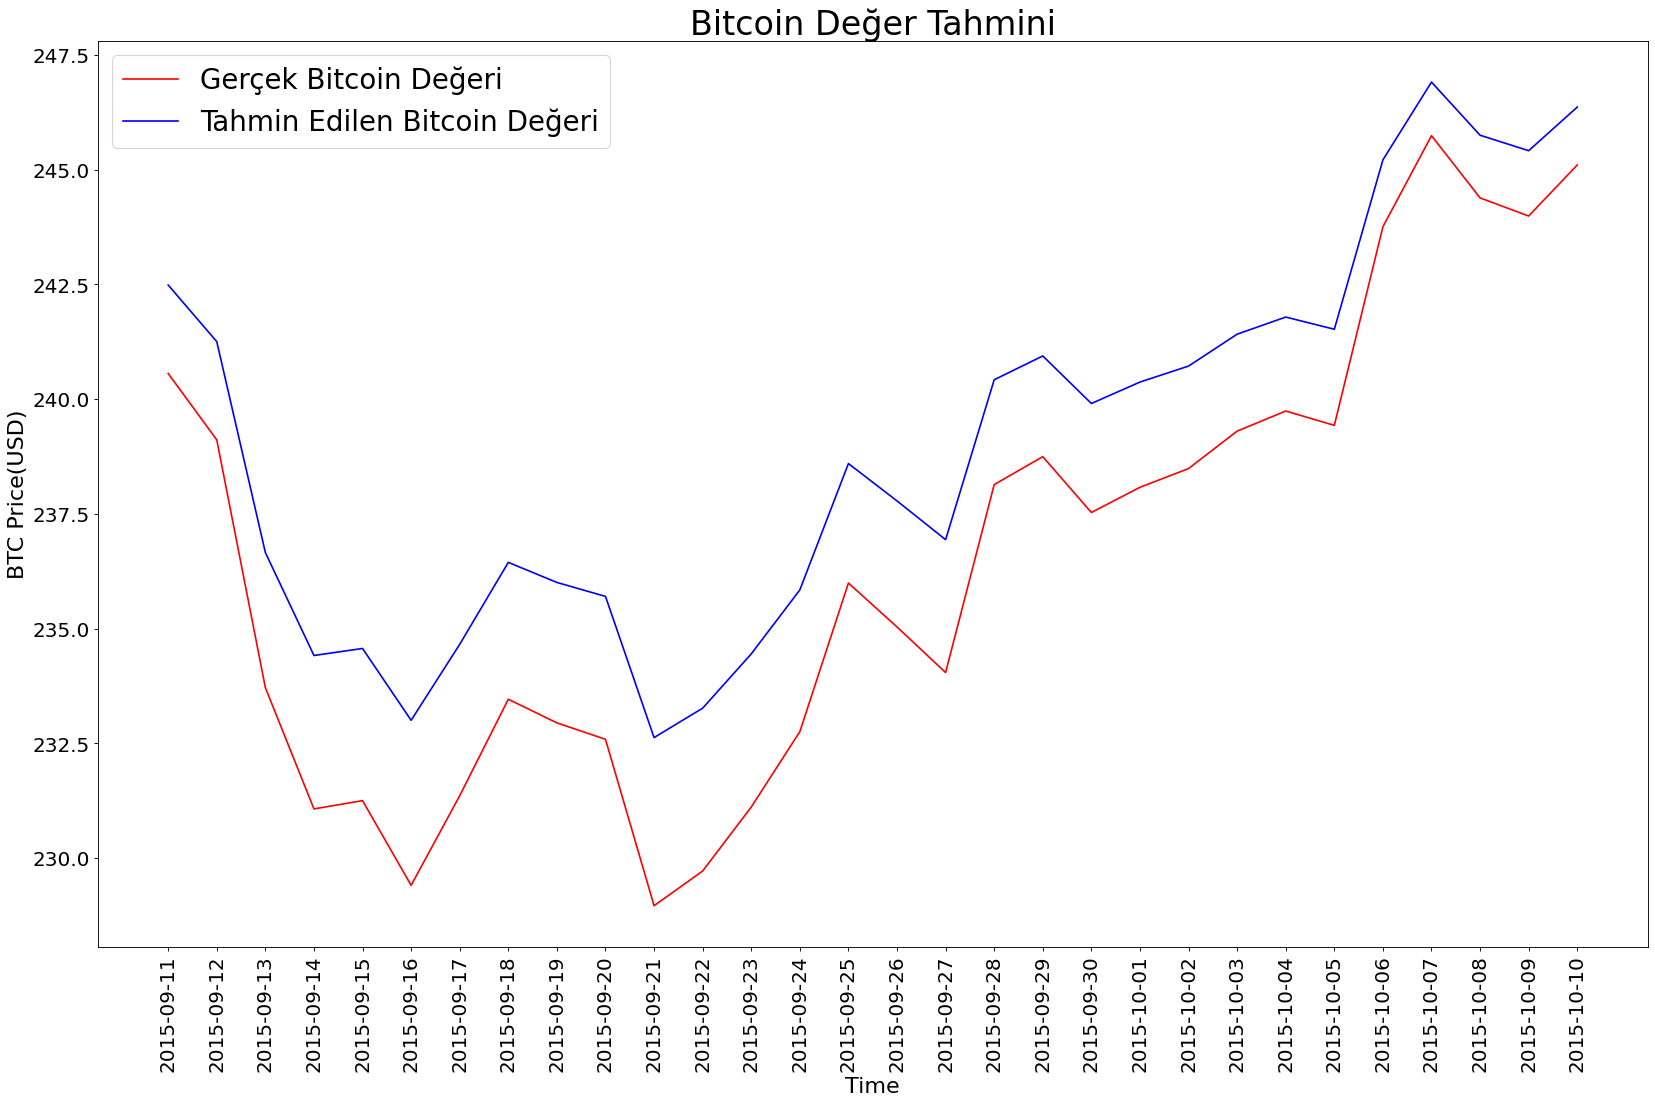

In [ ]:
# Sonuçları görselleştirme
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Gerçek Bitcoin Değeri')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Tahmin Edilen Bitcoin Değeri')
plt.title('Bitcoin Değer Tahmini', fontsize=30)
dframe_test = dframe_test.reset_index()
x=dframe_test.index
labels = dframe_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=20)
plt.ylabel('BTC Price(USD)', fontsize=20)
plt.legend(loc=2, prop={'size': 25})
plt.show()